(400, 400)
[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]
True
True
True
raggio spettrale Gauss-Seidel SOR  0.8555635606430655
513


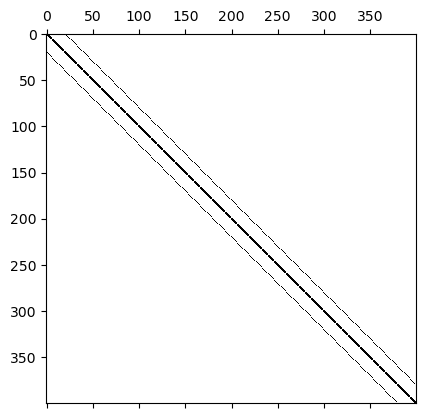

In [63]:
from scipy.io import loadmat
from scipy.linalg import qr
import numpy as np
import matplotlib.pyplot as plt
import SolveTriangular

# Esercizio 1

dati = loadmat('Test_I.mat')
A=dati["A"] 
A=A.astype(float)
print(A.shape) # di grandi dimensioni
b=dati["b"]
b=b.astype(float)
print(A)
x0 = np.zeros_like(b)

plt.spy(A) # è sparsa

print(np.sum(np.array(A[1,:])) < A[0][0])
#print(b) # visto che non tutti i valori di b sono uguali a 1 non ha diagonale strettamente dominante

print(A.all() == A.T.all()) # è simmetrica
autoval = np.linalg.eigvals(A)
print(autoval.all() > 0) # è definita positiva

def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    Dinv=np.linalg.inv(D)
    E=np.tril(A, -1)
    F=np.triu(A, +1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.linalg.inv(Momega)@Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it < it_max and errore > toll:
        temp = b - np.dot(F, xold)
        xtilde, flag = SolveTriangular.Lsolve(M, temp) 
        xnew = (1 - omega) * xold + omega * xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

toll = 1e-10
it_max = 1000
omega = 1.692
xnew,it,er_vet = gauss_seidel_sor(A,b,x0,toll,it_max,omega)
print(it)
#print(xnew)

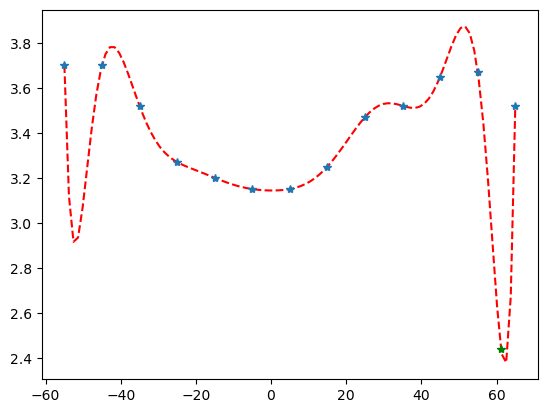

[[         1        -55       3025    -166375    9150625 -503284375]
 [         1        -45       2025     -91125    4100625 -184528125]
 [         1        -35       1225     -42875    1500625  -52521875]
 [         1        -25        625     -15625     390625   -9765625]
 [         1        -15        225      -3375      50625    -759375]
 [         1         -5         25       -125        625      -3125]
 [         1          5         25        125        625       3125]
 [         1         15        225       3375      50625     759375]
 [         1         25        625      15625     390625    9765625]
 [         1         35       1225      42875    1500625   52521875]
 [         1         45       2025      91125    4100625  184528125]
 [         1         55       3025     166375    9150625  503284375]
 [         1         65       4225     274625   17850625 1160290625]]
748849872.1154274
6
[[ 6.08974359e-10]
 [-8.29691142e-08]
 [-3.28744172e-06]
 [ 4.31406614e-04]
 [ 3.8

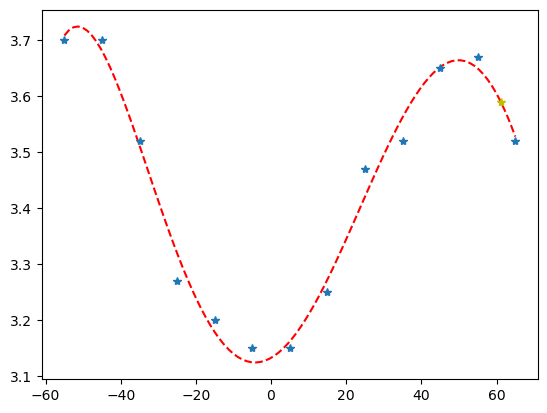

In [77]:
# Esercizio 2

L = np.array([-55,-45,-35,-25,-15,-5,5,15,25,35,45,55,65])
T = np.array([3.7,3.7,3.52,3.27,3.2,3.15,3.15,3.25,3.47,3.52,3.65,3.67,3.52])

def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
        xzeri=xnodi[1:n]
    else:
        xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num= np.poly(xzeri)
    den= np.polyval(num, xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
    """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
    """
    n=x.size
    m=xx.size
    L=np.zeros((m,n))
    for j in range(n):
        p= plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    return L@y

xx = np.linspace(np.min(L),np.max(L), 100)
interPunti = InterpL(L,T,xx)
plt.plot(xx,interPunti,'r--', L,T, '*',61.2,InterpL(L,T,np.array([61.2])),'g*')
plt.show()

n=5
n1=n+1
A1=np.vander(L,increasing=True)[:,:n1]
print(A1)
print(np.linalg.cond(A1)) # è mal condizionata
print(np.linalg.matrix_rank(A1)) # rango massimo

def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=qr(A)
    h= Q.T@b
    x,flag=SolveTriangular.Usolve(R[:n,:n],h[:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

x, res = qrLS(A1,T)
x = np.flip(x)
print(x)

fy = np.polyval(x, xx)
plt.plot(xx,fy,'r--',L,T, '*',61.2,np.polyval(x, 61.2),'y*')